# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
telco = pd.read_csv('telco_clean.csv')
telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
telco.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1. Churn

In [5]:
churn = telco['Churn'].value_counts()
churn

No     5174
Yes    1869
Name: Churn, dtype: int64

Number of Missing Values: 0


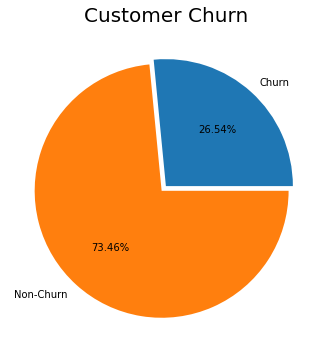

In [6]:
print("Number of Missing Values:", telco['Churn'].isna().sum())

churn_rate = churn / len(telco.Churn)
values = list(churn.sort_values().values)
labels = 'Churn', 'Non-Churn'
explode = [0, 0.05]

plt.figure(figsize=(5,5))
plt.pie(values, labels = labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')

plt.title('Customer Churn', fontsize=20)
plt.tight_layout()
plt.show()

__Terlihat bahwa datanya imbalance, maka diperlukan perlakuan khusus nantinya pada saat modeling machine learning. Kita akan menganalisa lebih jauh features lainnya dengan membandingkannya dengan persentase dari churn.__

In [7]:
# melihat berapa kerugian keuangan jika pelanggan memilih churn atau beralih

loss = telco[['Churn','TotalCharges']][telco['Churn'] == 'Yes']
loss

,Churn,TotalCharges
2,Yes,108.15
4,Yes,151.65
5,Yes,820.50
8,Yes,3046.05
13,Yes,5036.30
...,...,...
7021,Yes,727.80
7026,Yes,403.35
7032,Yes,75.75
7034,Yes,6886.25


In [8]:
loss['TotalCharges'] = pd.to_numeric(loss['TotalCharges'])
loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Churn         1869 non-null   object 
 1   TotalCharges  1869 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


In [9]:
loss['TotalCharges'].sum()

2862926.9

Dapat dilihat bahwa dengan keadaan saat ini, terdapat pemasukan kotor sebesar $2.862.926,9 juta dollar AS akibat pelanggan yang churn.

__Kita dapat membagi features yang ada menjadi tiga kelompok, yaitu:__

- __Demographic__
- __Services-related__
- __Account information (categorical dan numerical)__

__Untuk setiap kelompok, kita akan melihat distribusinya, kemudian persentase churn dari masing-masing katagori untuk melihat hubungannya dengan perilaku churn pelanggan.__ 

In [10]:
demo_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
#Label encoding Churn supaya bisa menggunakan sns.barplot

le = LabelEncoder()
telco['Churn'] = le.fit_transform(telco['Churn'])
telco['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## 2. Demographic Features

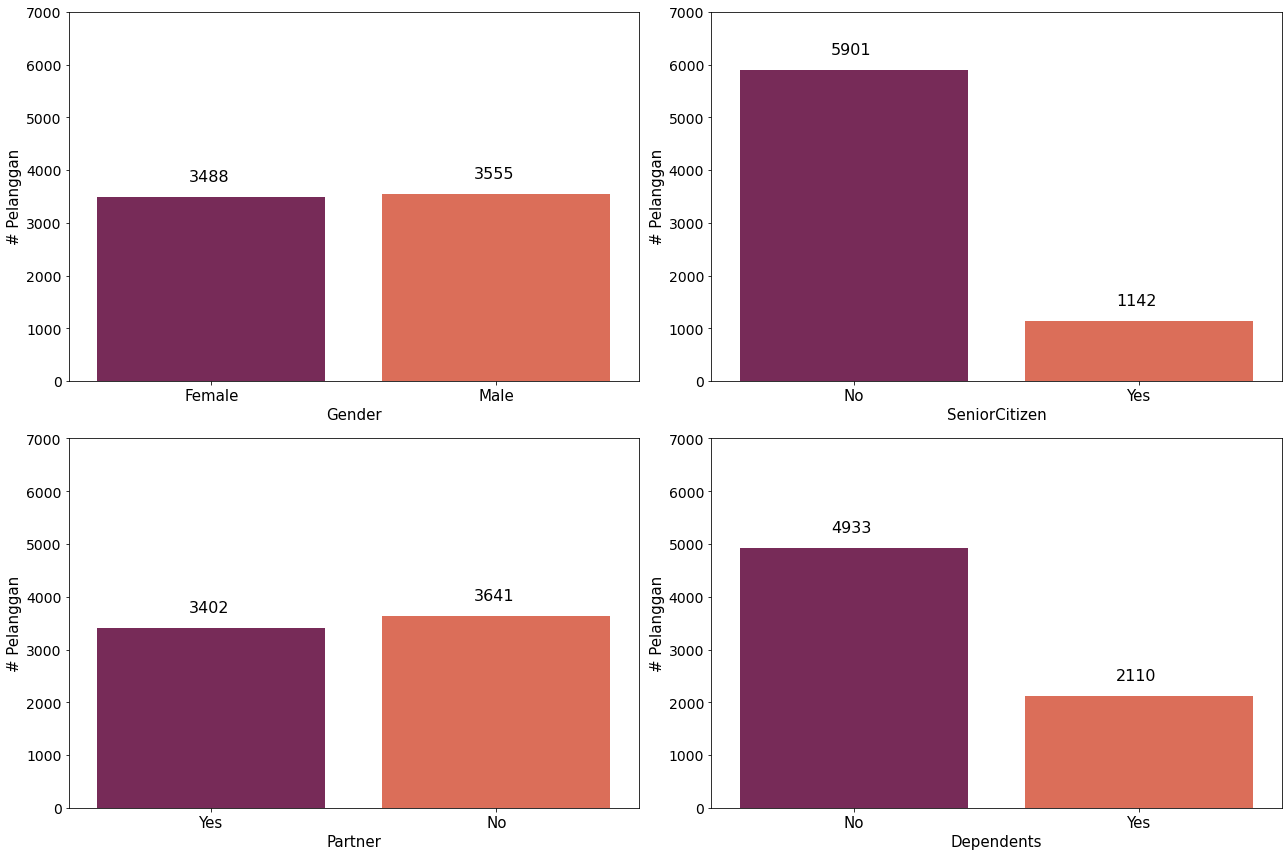

In [12]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("# Pelanggan", fontsize= 15)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

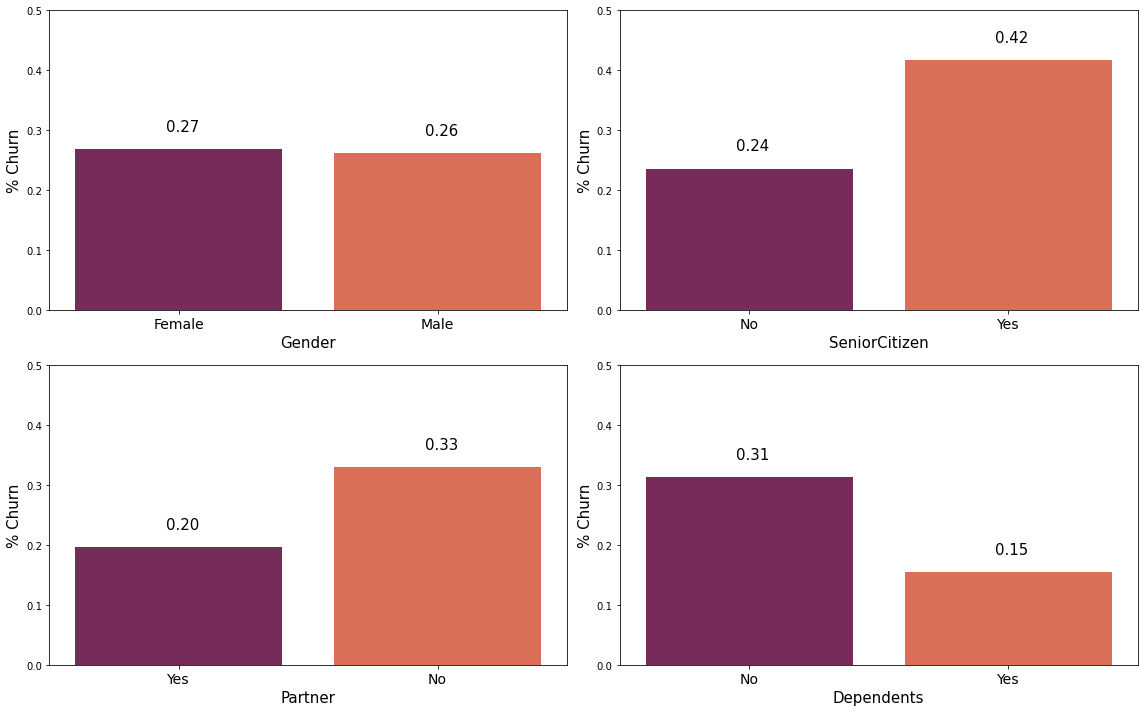

In [13]:
plt.figure(figsize=(16,10))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = telco, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Dapat disimpulkan bahwa:

- Gender: Hampir tidak ada perbedaan perbedaan persentase churn antara pria dan wanita.
- Senior Citizen: Persentase churn dalam kelompok senior citizen adalah 42%, ada indikasi churn yang tinggi pada kelompok tersebut.
- Parner: Pelanggan yang tidak memiliki pasangan cenderung untuk churn dibandingkan pelanggan yang memiliki psangan.
- Dependents: Pelanggan yang tidak memiliki tanggungan cenderung untuk churn dibandingkan pelanggan yang memiliki tanggungan.

Mari kita perdalam analisis mengenai fitur Partner dan Dependents. Karena ada kemungkinan keduanya memiliki hubungan, dan juga sebagaimana terlihat di atas bahwa kedua fitur tersebut berkontribusi besar dalam kecenderungan untuk churn atau tidak. Pada umumnya pelanggan yang memiliki tanggungan (anak) adalah mereka yang sudah menikah. Sehingga ada kemungkinan partner memengaruhi pelanggan untuk memiliki tanggungan atau tidak.

In [14]:
telco.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            3280
         Yes            361
Yes      Yes           1749
         No            1653
Name: Dependents, dtype: int64

Sebagaimana kita asumsikan sebelumnya, terlihat bahwa kebnyakan pelanggan yang memiliki tanggungan adalah mereka yang juga memiliki partner. Meskipun ternyata jumlah pelanggan yang tidak memiliki partner namun memiliki tanggungan terlihat cukup besar.

In [15]:
telco.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.657622
                     1        0.342378
         Yes         0        0.786704
                     1        0.213296
Yes      No          0        0.745917
                     1        0.254083
         Yes         0        0.857633
                     1        0.142367
Name: Churn, dtype: float64

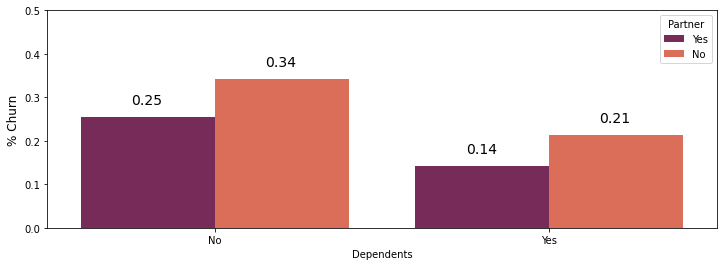

In [16]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

Dapat kita lihat bahwa kedua fitur berkontribusi besar dalam kecenderungan untuk churn. Kelompok pelanggan yang memiliki pasangan serta tanggungan dan kelompok pelanggan yang tidak memilki keduanya secara berurutan memiliki persentase churn sebesar 14% dan 34%. 

Hubungan antara senior citizen dan dependents dalam kecenderngan untuk churn juga dapat diperdalam untuk menemukan insight lain.

In [17]:
telco.groupby(['SeniorCitizen'])['Dependents'].value_counts()

SeniorCitizen  Dependents
No             No            3882
               Yes           2019
Yes            No            1051
               Yes             91
Name: Dependents, dtype: int64

In [18]:
telco.groupby(by=['SeniorCitizen', 'Dependents'])['Churn'].value_counts(normalize = True)

SeniorCitizen  Dependents  Churn
No             No          0        0.719474
                           1        0.280526
               Yes         0        0.849430
                           1        0.150570
Yes            No          0        0.568030
                           1        0.431970
               Yes         0        0.758242
                           1        0.241758
Name: Churn, dtype: float64

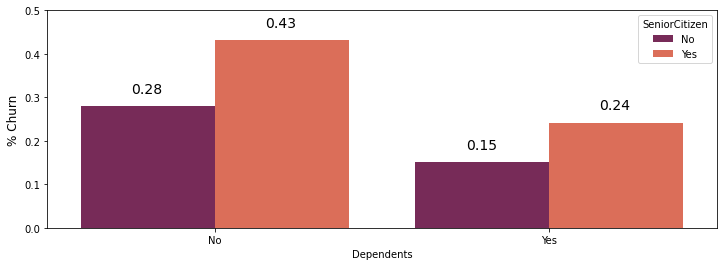

In [19]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "SeniorCitizen", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

Secara umum, jumlah senior citizen (pelanggan dengan usia 65 tahun ke atas) yang memiliki tanggungan, jumlahnya sangat sedikit. Dari 1142 senior citizen, hanya 91 yang memiliki tanggungan. Yang perlu diperhatikan adalah kecenderungan untuk churn dari senior citizen yang tidak memiliki tanggungan. Dimana jumlahnya mencapai 43%.

## 3. Service-Related Features

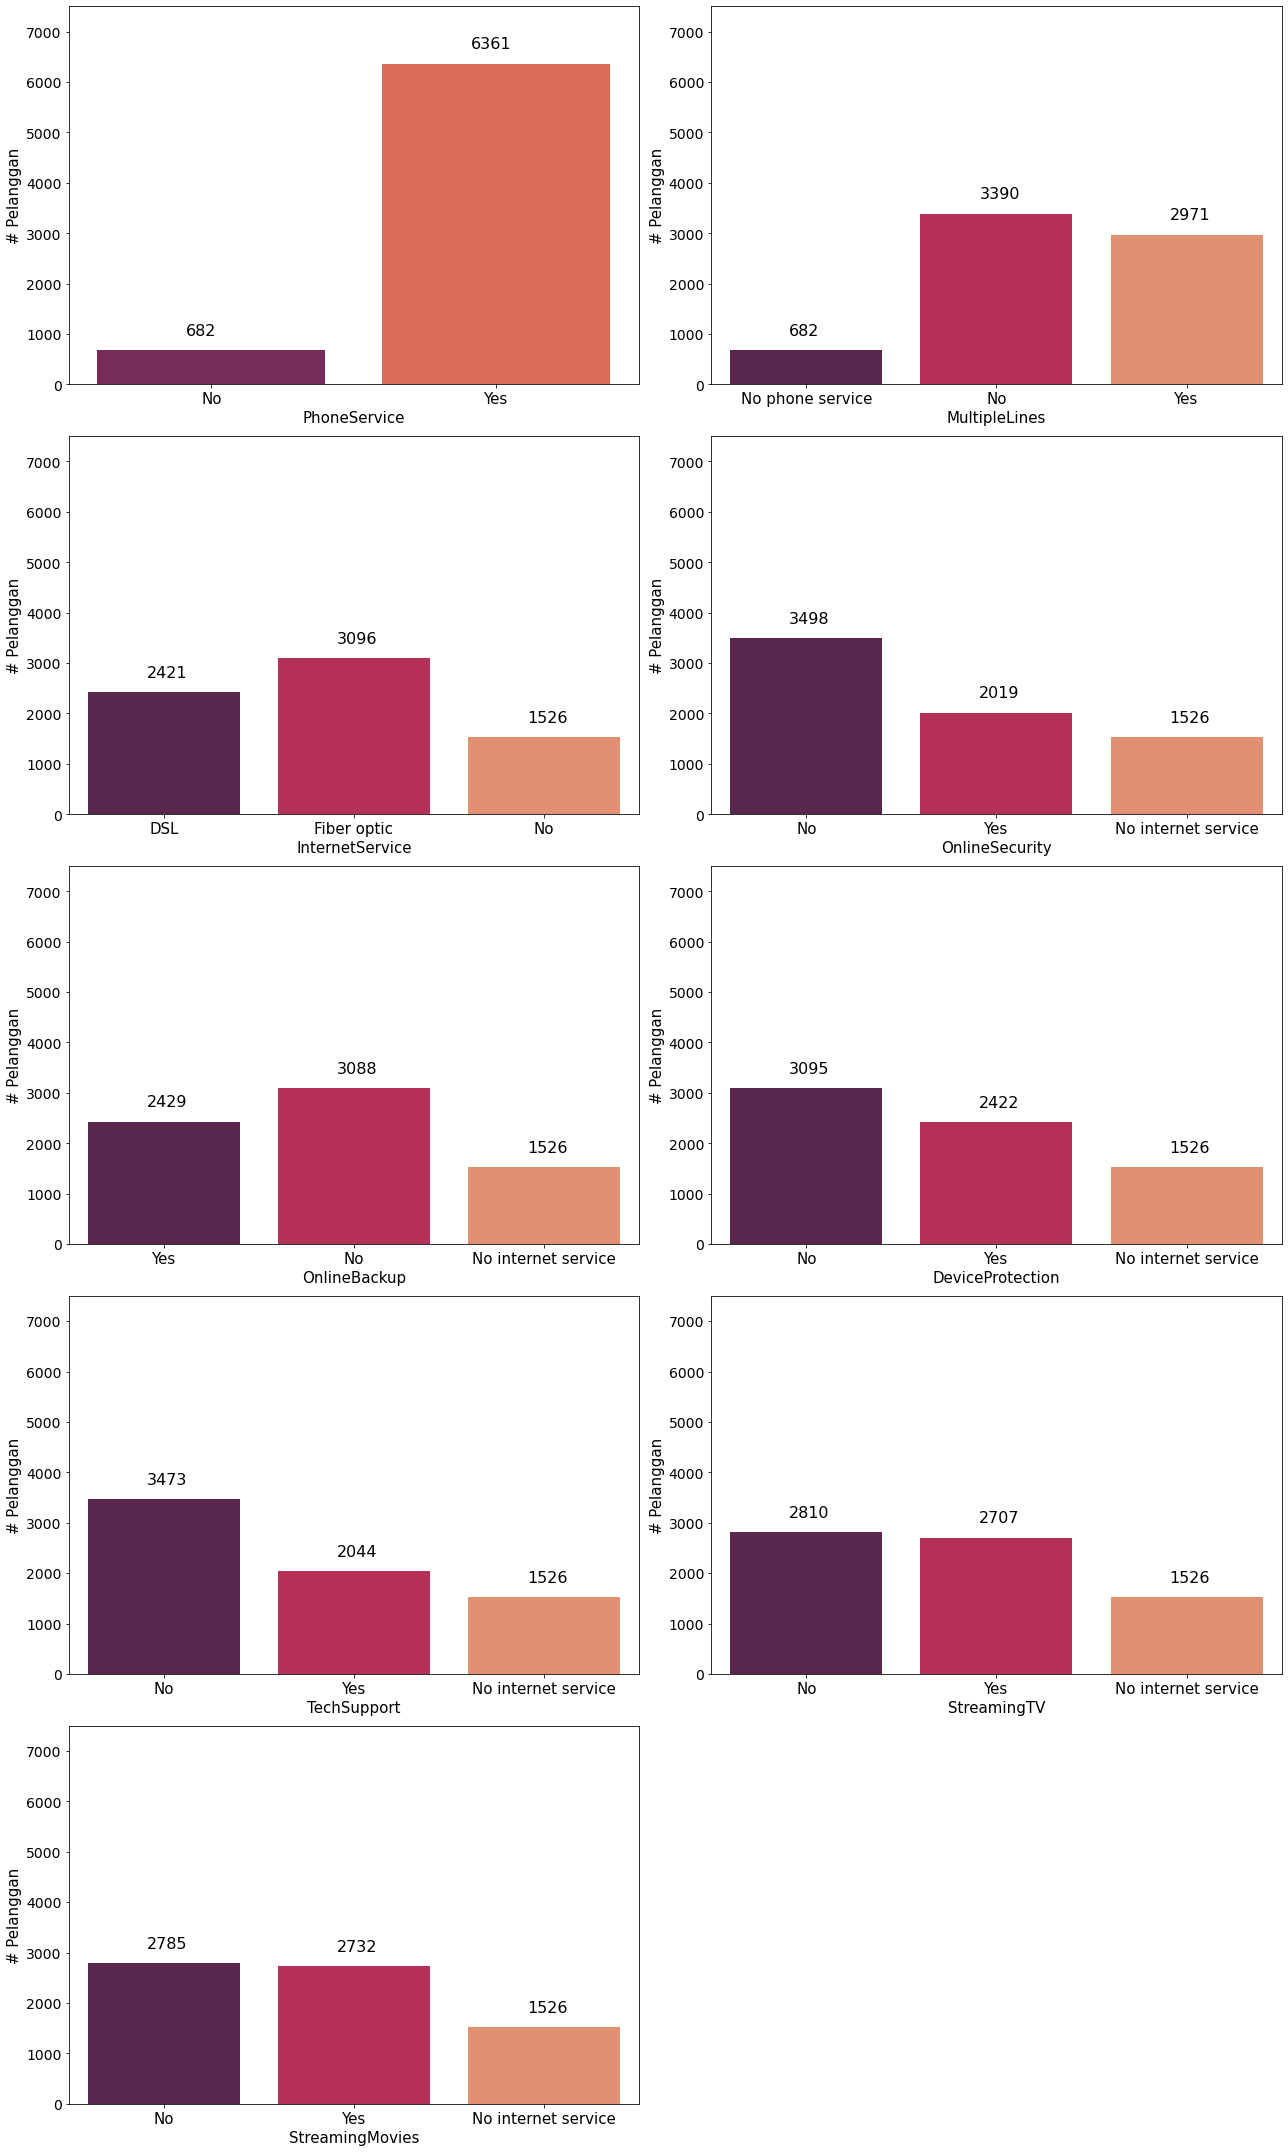

In [20]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("# Pelanggan", fontsize= 15)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

Ada sebagian pelanggan yang tidak memiliki internet service dan bahkan sejumlah kecil pelanggan tidak memiliki phone service. Dapat kita lihat bahwa sebagian besar feature yang ada berhubungan dengan ketersediaan internet.

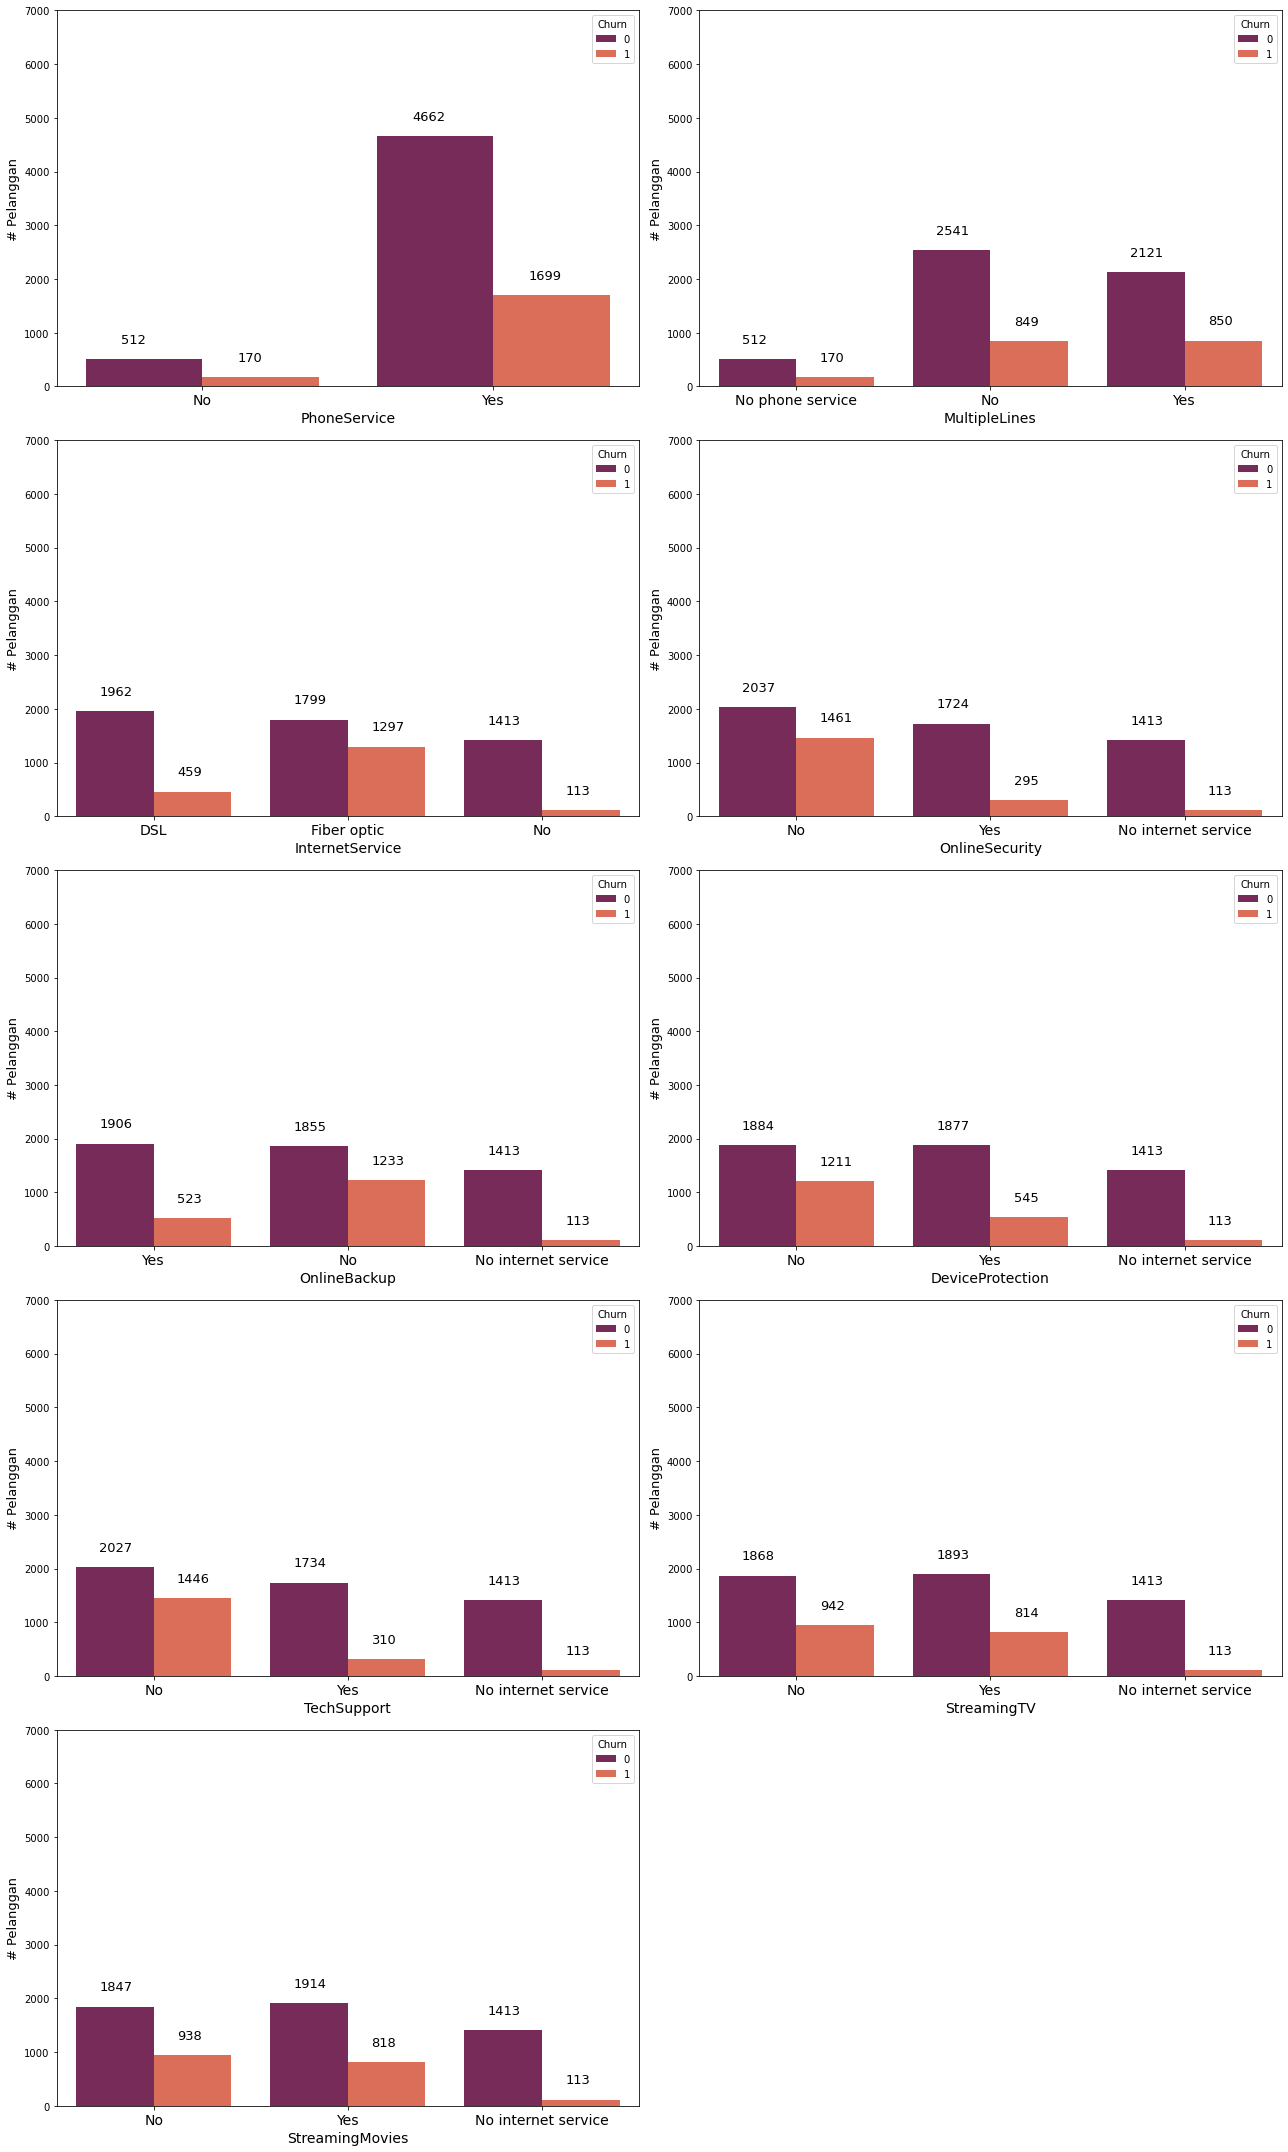

In [21]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# Pelanggan", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

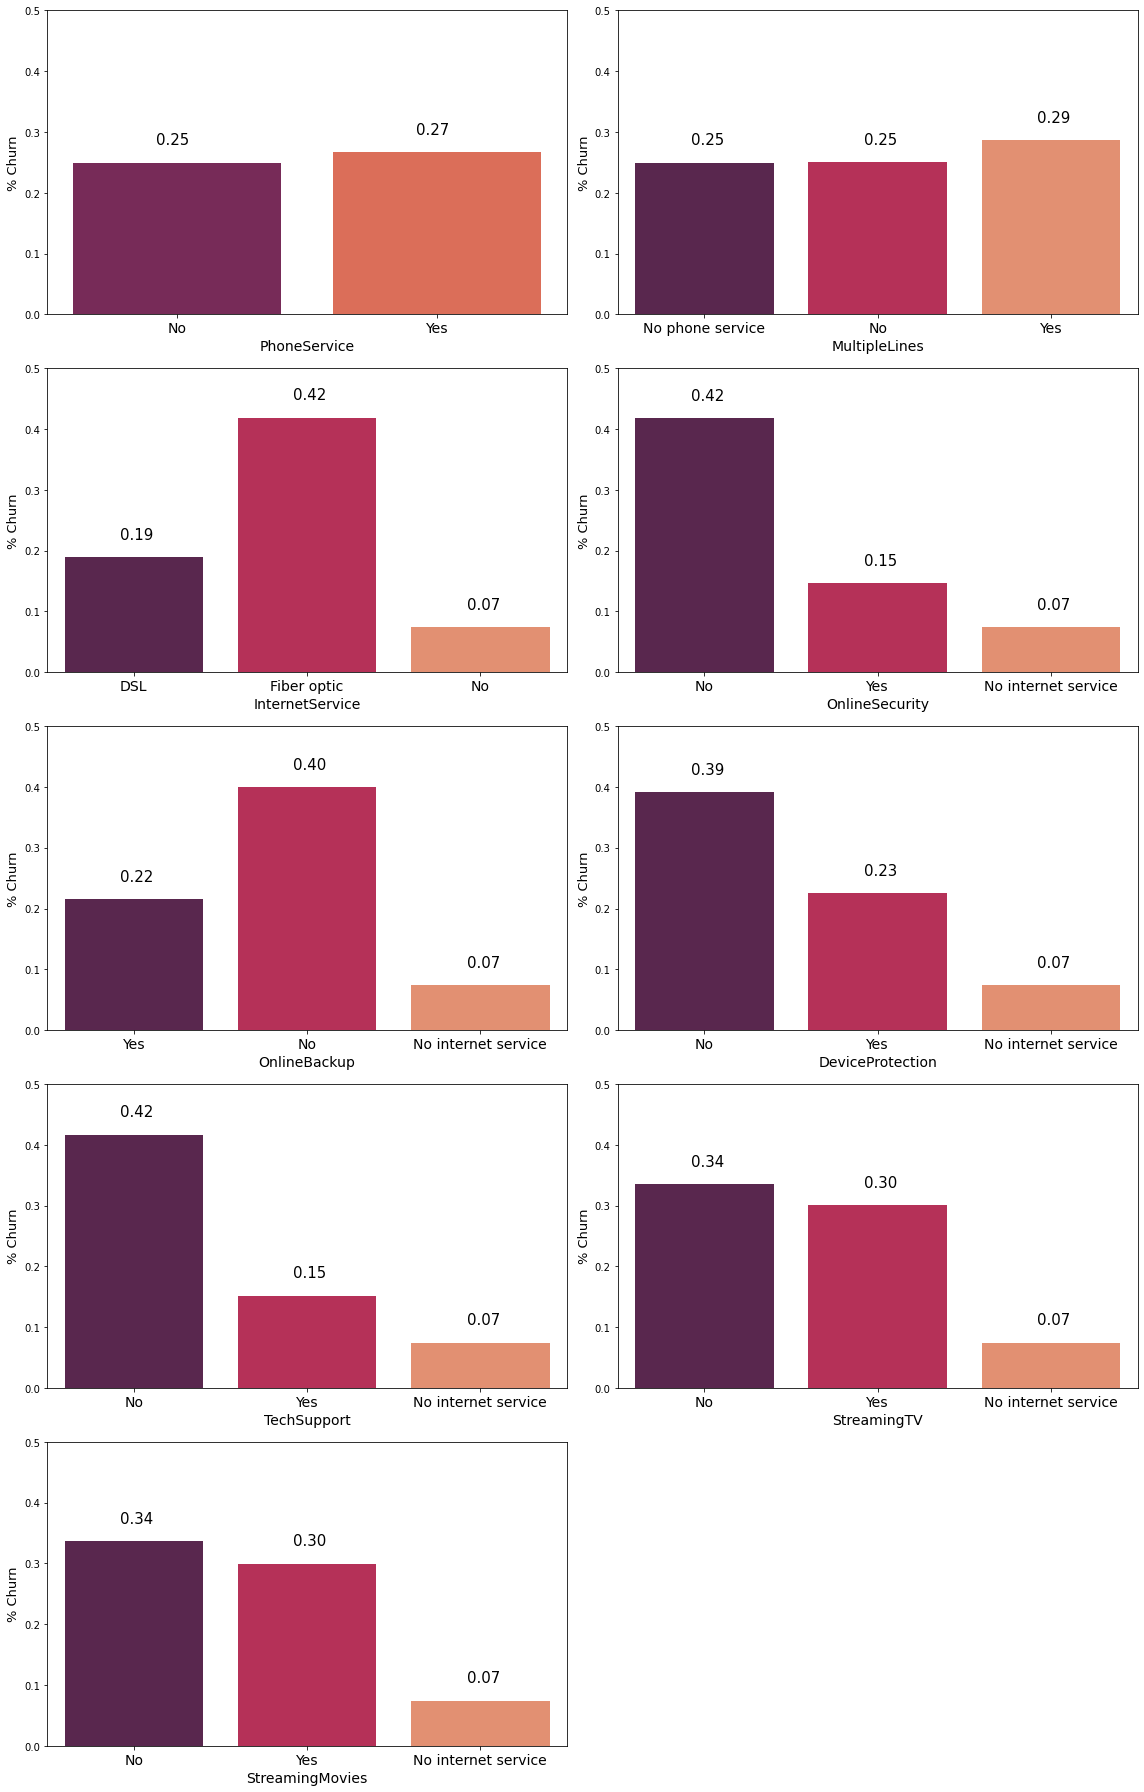

In [22]:
plt.figure(figsize=(16,25))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = telco, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Perbedaan churn antara pelanggan dengan atau tanpa Phone Service cukup tipis.

Terlihat perbedaan yang cukup besar dalam masing-masing kategori yang terdapat dalam feature Internet Service. Kecenderungan untuk churn dari pelanggan yang menggunakan DSL dalam layanan internet adalah yang paling kecil. Meskipun fiber optic lebih cepat dari DSL tapi ternyata kecenderungan pelanggan untuk churn cukup besar, yaitu sebesar 42%. Ada indikasi hal ini dipengaruhi juga oleh harganya yang lebih mahal.

In [23]:
telco.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.079194
DSL            58.102169
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

Sebagaimana dapat kita lihat, biaya bulanan fiber optic adalah yang paling mahal. Tanpa informasi tambahan memang sulit mengambil kesimpulan, namun tampaknya layanan fiber optic tidak cukup untuk membuat pelanggan bertahan. Bisa jadi jaringan fiber optic tidak meberikan kecepatan sebagaimana harapan dari pelanggan.

Pada layanan lainnya kecenderungan untuk churn dari pelanggan yang tidak menggunakan layanan. Perbedaan yang sangat besar dapat dilihat dalam Tech Support dan Online Security. Sementara yang paling kecil terdapat dalam layanan streaming. Fitur Streaming TV dan Movies menunjukkan data yang sangat mirip. 

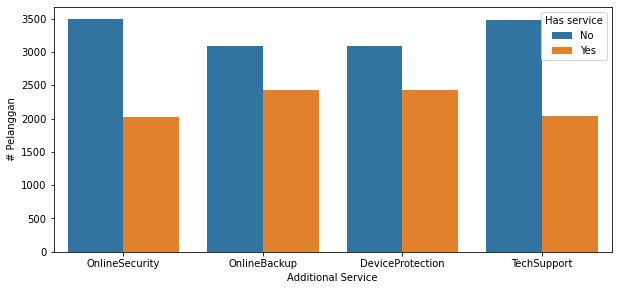

In [24]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
telco_1 = pd.melt(telco[telco["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=telco_1, x='variable', hue='Has service')
ax.set(xlabel='Additional Service', ylabel='# Pelanggan')
plt.show()

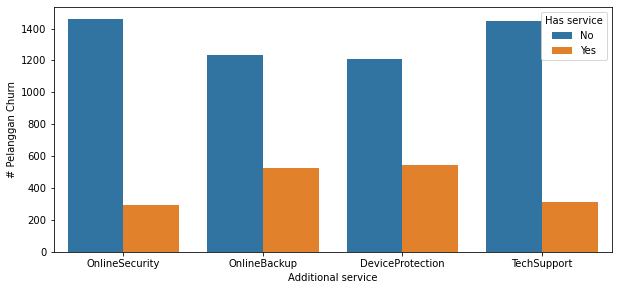

In [25]:
plt.figure(figsize=(10, 4.5))
telco_1 = telco[(telco.InternetService != "No") & (telco.Churn == 1)]
telco_1 = pd.melt(telco_1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=telco_1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='# Pelanggan Churn')
plt.show()

In [26]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
telco_1 = pd.melt(telco[telco["InternetService"] != "No"][cols]).value_counts()
telco_1

variable          value
OnlineSecurity    No       3498
TechSupport       No       3473
DeviceProtection  No       3095
OnlineBackup      No       3088
                  Yes      2429
DeviceProtection  Yes      2422
TechSupport       Yes      2044
OnlineSecurity    Yes      2019
dtype: int64

Untuk menarik kesimpulan lebih jauh, sebagiknya kita hitung biaya bulanan yang dikeluarkan pelanggan untuk Tech Support dan Online Security.

In [27]:
print(telco.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(telco.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(telco.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.079194
No                     74.586683
Yes                    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.079194
No                     75.693067
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.079194
No                   No                     74.188367
Yes                  No                     75.692011
No                   Yes                    79.758148
Yes                  Yes                    81.472930
Name: MonthlyCharges, dtype: float64


Kedua layanan tersebut ternyata tidak berpengaruh banyak terhadap biaya yang dikeluarkan oleh pelanggan. Kita juga dapat melihat apakah pelanggan yang menggunakan kedua layanan tersebut berpengaruh signifikan terhadap kecenderungan untuk churn.

In [28]:
print(telco.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts())

TechSupport          OnlineSecurity     
No                   No                     2553
                     Yes                     920
No internet service  No internet service    1526
Yes                  Yes                    1099
                     No                      945
Name: OnlineSecurity, dtype: int64


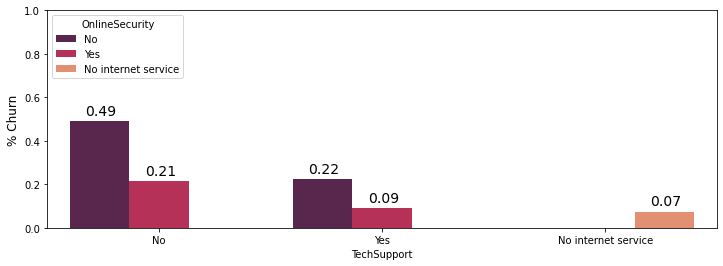

In [29]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=14)

plt.show()

Perbedaannya ternyata cukup signifikan. Pelanggan yang tidak menggunakan kedua layanan tersebut memiliki kecenderungan untuk churn hampir 50%, sedangkan yang menggunakan keduanya tidak sampai 10% yang churn.

## 4. Account Information Categorical

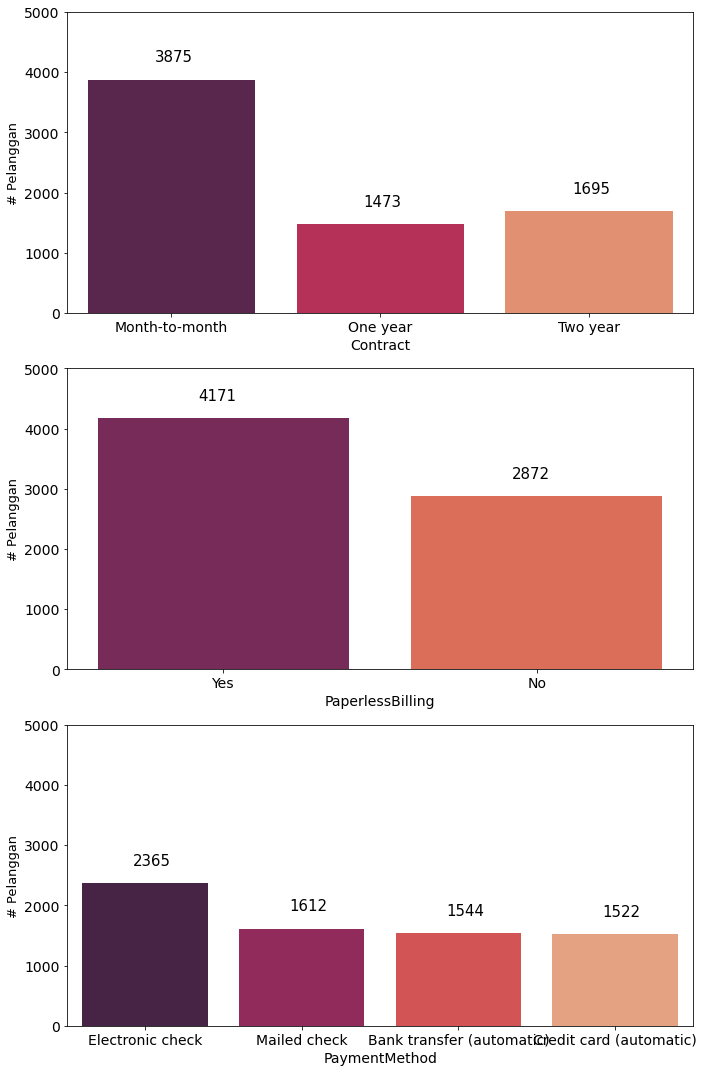

In [30]:
plt.figure(figsize=(10,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = telco, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# Pelanggan", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()

plt.show()

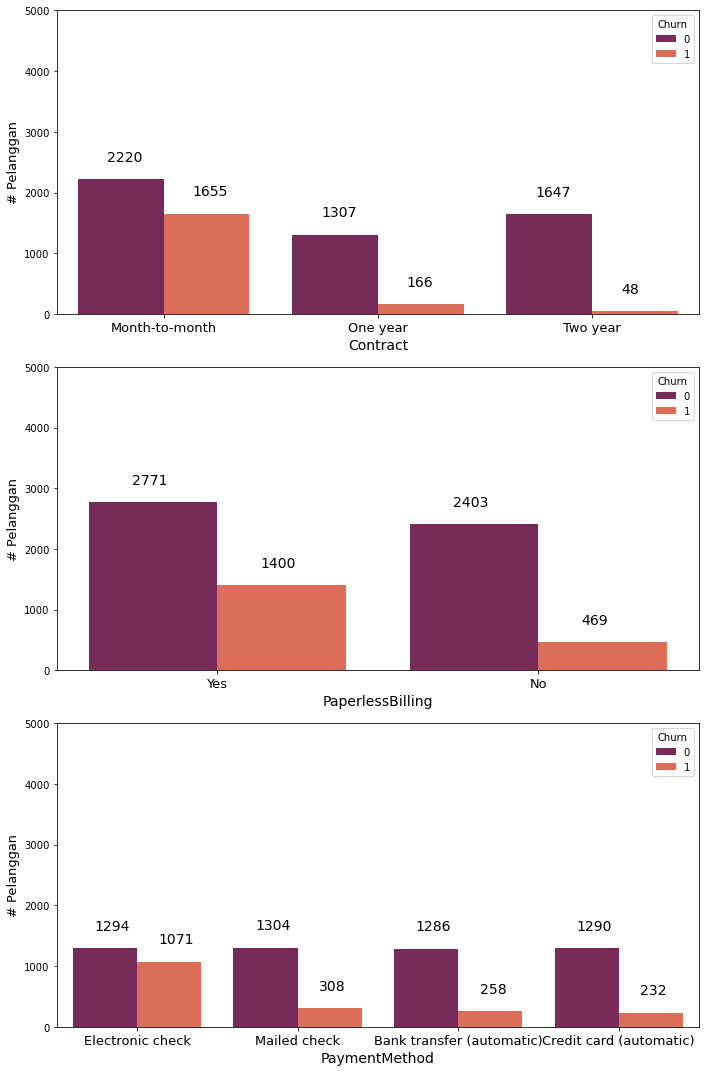

In [31]:
plt.figure(figsize=(10,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# Pelanggan", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

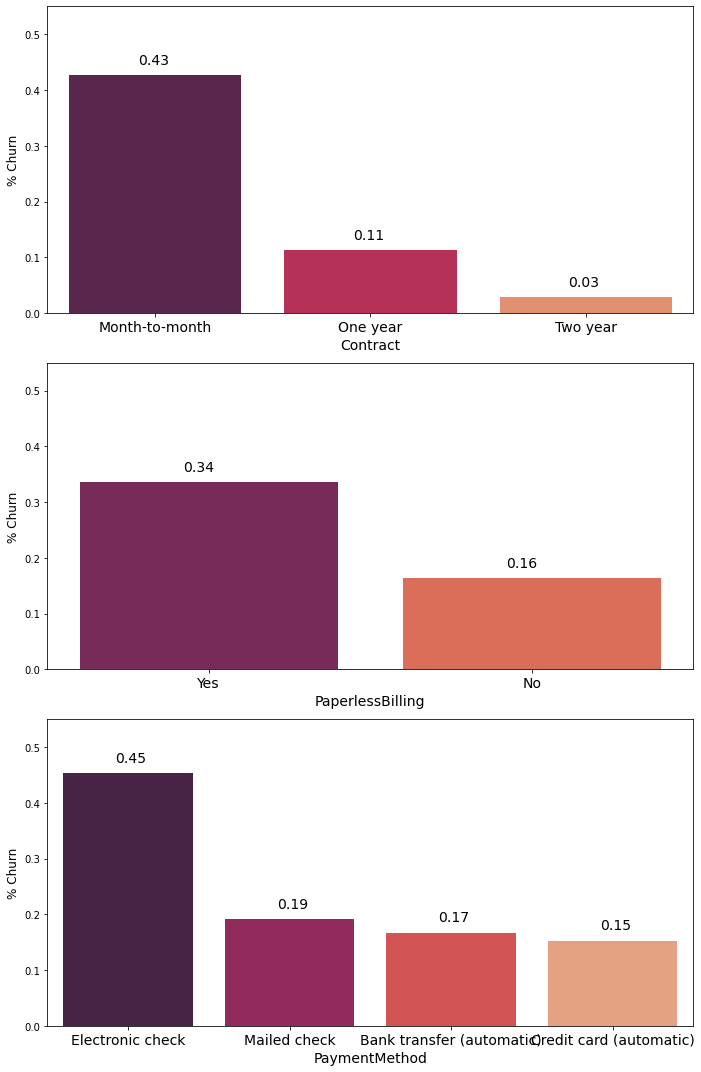

In [32]:
plt.figure(figsize=(10,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = telco, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% Churn", fontsize= 12)
    plt.ylim(0,0.55)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.02),fontsize=14)

plt.tight_layout()

plt.show()

Dalam fitur Contract, persentase churn paling tinggi terdapat dalam kategori pembayaran bulanan, yang mana juga sekaligus adalah jenis kontrak yang paling banyak digunakan. 

Dalam Payment Method, dapat kita lihat bahwa Electronic Check menjadi kategori yang paling banyak churn-nya. Yang jika diperhatikan, electroni check merupakan bagian dari opsi Paperless Billing. Ada kemungkinan pelanggan yang churn dalam opsi pembayaran bulanan juga merupakan pelanggan yang menggunakan electronic check.

In [33]:
print(telco.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(telco.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaperlessBilling
Month-to-month  Yes                 0.667355
                No                  0.332645
One year        Yes                 0.543109
                No                  0.456891
Two year        No                  0.536873
                Yes                 0.463127
Name: PaperlessBilling, dtype: float64  

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270197
                Bank transfer (automatic)    0.265445
                Electronic check             0.235574
                Mailed check                 0.228785
Two year        Credit card (automatic)      0.342773
                Bank transfer (automatic)    0.332743
                Mailed check                 0.225369
                Ele

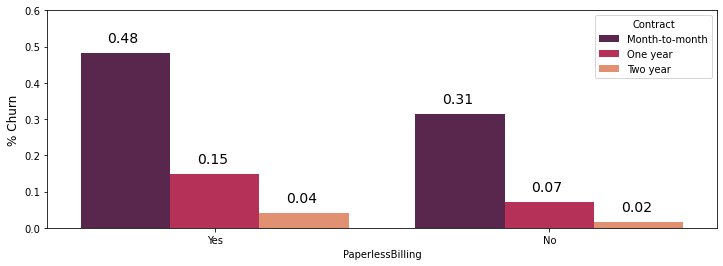

In [34]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.08, p.get_height()+0.03),fontsize=14)

plt.show()

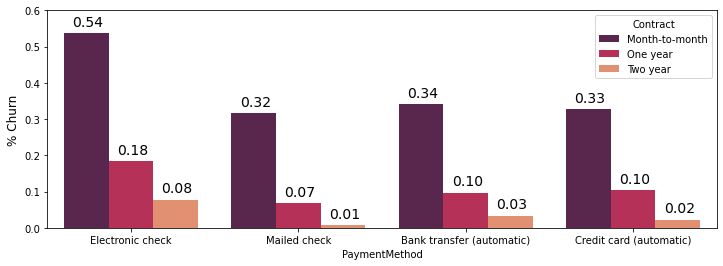

In [35]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaymentMethod", y = "Churn", hue = "Contract", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.020),fontsize=14)

plt.show()

Dapat kita lihat dari hasil pengelompokan di atas, persentase churn dari pelanggan yang melakukan pembayaran bulanan dan menggunakan paperless billing jenis electronic check lebih tinggi daripada yang lain. 

In [36]:
print(telco.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(telco.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.549360
                 No                  0.450640
Fiber optic      Yes                 0.773579
                 No                  0.226421
No               No                  0.707733
                 Yes                 0.292267
Name: PaperlessBilling, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.267658
                 Mailed check                 0.253201
                 Credit card (automatic)      0.245353
                 Bank transfer (automatic)    0.233788
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.485583
                 Bank transfer (automatic)    0.217562
                 Credit card (automatic)      0.216907
 

Dari pengelompokan di atas dapat kita lihat bahwa:

- Pelanggan dengan internet service = 'No': 29% nya menggunakan paperless billing dan 8% diantaranya menggunakan electronic check.
- Pelanggan dengan internet service = 'fiber optic': 77% nya menggunakan paperless billing dan 51% diantaranya menggunakan electronic check.

Sebagaimana kita ingat bahwa di awal analisis kita menemukan bahwa churn paling rendah dalam fitur internet service terdapat dalam kategori tidak menggunakan layanan internet dan yang paling banyak terdapat dalam kategori fiber optic. Kita dapat melihat perbandingan biaya bulanan dan kontrak pelanggan untuk memastikan apakah harga menjadi penyebab pelanggan untuk churn.

In [37]:
print(telco.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values())

Contract
Two year          60.770413
One year          65.048608
Month-to-month    66.398490
Name: MonthlyCharges, dtype: float64


Terlihat memang biaya bulanan yang dibayarkan pelanggan dengan kontrak bulanan sedikit lebih mahal daripada yang menggunakan kontrak tahunan. Namun selisihnya dapat dikatakan sangat sedikit. Asumsi bahwa biaya bulanan yang menyebabkan pelanggan untuk churn tentunya tidak relevan. 

Tanpa informasi lebih mendalam kita tidak dapat menyimpulkan lebih jauh, sementara ini yang dapat kita simpulkan adalah bahwa fitur fitur tersebut akan berguna dalam permodelan nantinya.

## 5. Account Information Numerical

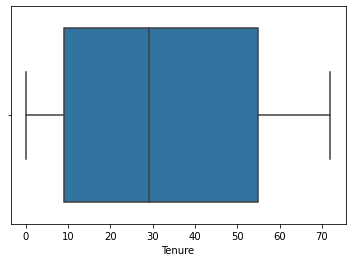

<Figure size 576x216 with 0 Axes>

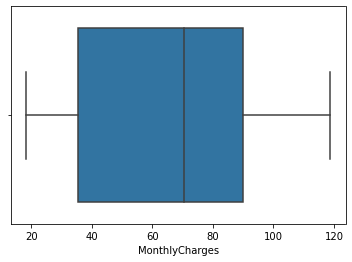

<Figure size 576x216 with 0 Axes>

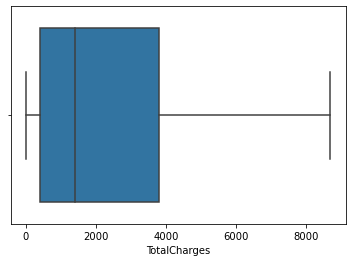

<Figure size 576x216 with 0 Axes>

In [38]:
for i,col in enumerate(num_accinfo_features): 
    sns.boxplot(x = telco[col])
    fig = plt.figure(figsize=(8,3))
    plt.show()

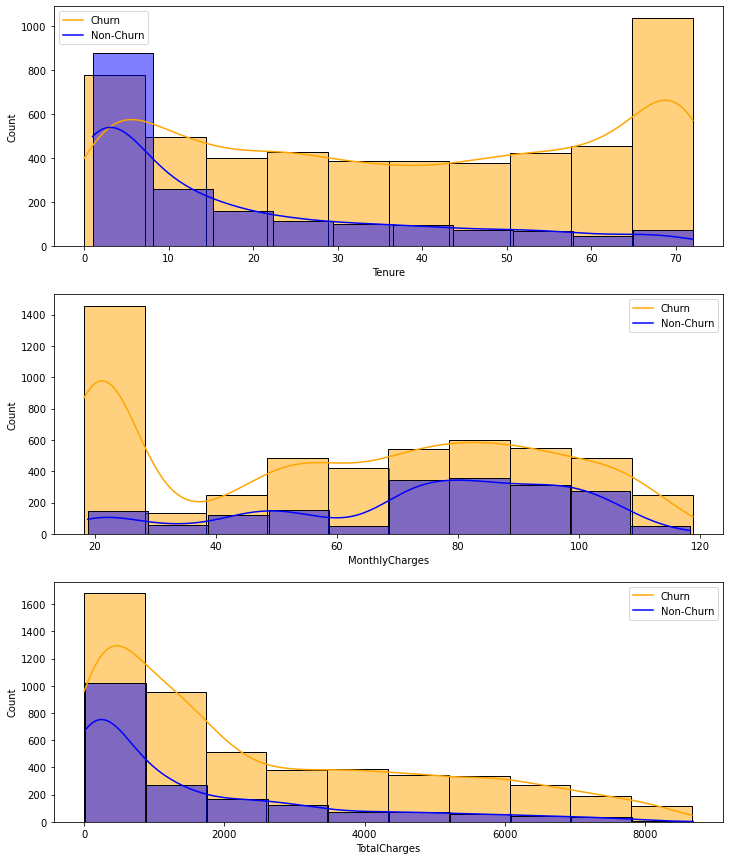

In [39]:
plt.figure(figsize=(12,15))

for i,col in enumerate(num_accinfo_features):    
    plt.subplot(3,1,i + 1)
    sns.histplot(telco[telco.Churn == 0][col],
                 bins=10,
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.histplot(telco[telco.Churn == 1][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

plt.show()

Dapat kita lihat bahwa:
- Tidak terdapat outlier dalam fitur Tenure, Monthly Charges, dan Total Charges.
- Tenure: Churn paling banyak terjadi di bulan-bulan awal.
- Monthly Charges: Churn paling banyak terjadi di biaya bulanan yang tinggi (sekitar 60 - 100).
- Total Charges: Distribusinya hampir sama, tapi pelanggan yang churn masih lebih tinggi.

In [40]:
print(telco.groupby(by=['Churn'])['Tenure'].mean().sort_values(), '\n')
print(telco.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(telco.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Churn
1    17.979133
0    37.569965
Name: Tenure, dtype: float64 

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
1    1531.796094
0    2549.911442
Name: TotalCharges, dtype: float64


1. Rata rata tenure untuk pelanggan yang churn lebih rendah daripada yang tidak.
2. Rata rata biaya bulanan untuk pelanggan yang churn lebih rendah daripada yang tidak.
3. Rata rata biaya total untuk pelanggan yang churn lebih rendah daripada yang tidak. Hal ini dimungkinkan karena tenure nya yang sedikit juga.

Density plot untuk pelanggan yang churn dalam fitur tenure menunjukkan banyak terkumpul di bulan-bulan awal. Kita dapat membagi tenure menjadi bin untuk melihatnya lebih jelas.

In [41]:
telco['Tenure_bin'] = pd.cut(telco['Tenure'],[-1,12,24,36,48,60,100])
telco['Tenure_bin'].value_counts(sort = False)

(-1, 12]     2186
(12, 24]     1024
(24, 36]      832
(36, 48]      762
(48, 60]      832
(60, 100]    1407
Name: Tenure_bin, dtype: int64

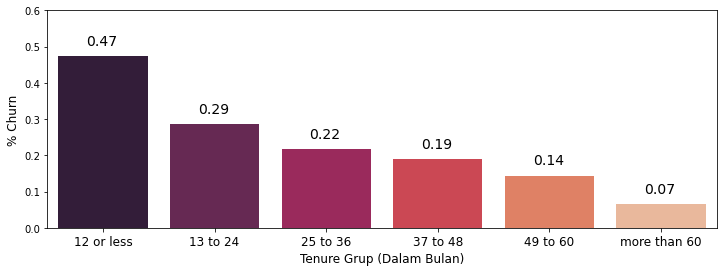

In [42]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Tenure_bin", y = "Churn", data = telco, palette = 'rocket', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Grup (Dalam Bulan)", fontsize= 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

Hampir 50% pelanggan yang churn merupakan yang berlanggan kurang dari 12 bulan. 

In [43]:
komplit = telco[(telco['OnlineSecurity'] == 'Yes') & (telco['OnlineBackup']=='Yes') &
               (telco['DeviceProtection']=='Yes') & (telco['TechSupport']=='Yes')]
komplit

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_bin
15,Female,No,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0,"(60, 100]"
28,Male,No,Yes,No,72,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,0,"(60, 100]"
30,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0,"(60, 100]"
32,Female,No,Yes,Yes,27,Yes,No,DSL,Yes,Yes,...,Yes,No,No,One year,No,Mailed check,66.15,1874.45,0,"(24, 36]"
43,Female,No,No,No,63,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,0,"(60, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,Female,Yes,Yes,No,61,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,0,"(60, 100]"
6978,Female,No,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Electronic check,80.70,5617.95,0,"(60, 100]"
6982,Female,No,Yes,Yes,72,Yes,No,DSL,Yes,Yes,...,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,0,"(60, 100]"
6995,Male,No,No,Yes,57,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,0,"(48, 60]"


In [44]:
print(komplit.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values(), '\n')

Contract
One year          90.308427
Month-to-month    90.433824
Two year          91.122478
Name: MonthlyCharges, dtype: float64 



In [45]:
joss = telco[(telco['OnlineSecurity'] == 'Yes') & (telco['OnlineBackup']=='Yes') &
               (telco['DeviceProtection']=='Yes')]
print(joss.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values(), '\n')

# 0 = No Churn

Contract
Month-to-month    86.479082
One year          88.142353
Two year          90.020353
Name: MonthlyCharges, dtype: float64 



In [46]:
combo = telco[(telco['OnlineSecurity'] == 'Yes') & (telco['OnlineBackup']=='Yes')]
print(combo.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values())

Contract
Month-to-month    79.004196
One year          83.105049
Two year          86.967542
Name: MonthlyCharges, dtype: float64


In [47]:
basic = telco[(telco['OnlineSecurity'] == 'Yes')]
print(basic.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values())

Contract
Month-to-month    73.889028
One year          78.302355
Two year          84.005890
Name: MonthlyCharges, dtype: float64


## 6. Kesimpulan

1. Terdapat pemasukan kotor sebesar $2.862.926,9 juta dollar AS yang hilang akibat pelanggan yang churn. 
1. Gender: Hampir tidak ada perbedaan perbedaan persentase churn antara pria dan wanita.
2. Senior Citizen: Persentase churn dalam kelompok senior citizen adalah 42%, ada indikasi churn yang tinggi pada kelompok tersebut.
3. Partner dan Dependents: Kedua fitur memiliki korelasi dan berkontribusi besar dalam kecenderungan pelanggan untuk churn.
4. Phone Service dan Internet Service: Ada sebagian pelanggan yang tidak memiliki internet service dan bahkan sejumlah kecil pelanggan tidak memiliki phone service. Sebagian besar feature lainnya yang tersedia berhubungan dengan internet service.
5. Internet Service: Pelanggan yang menggunakan DSL membayar biaya bulanan yang lebih murah daripada pengguna fiber optic. Pengguna fiber optic juga terlihat cenderung lebih banyak untuk churn.
6. Online Security, Online Backup, Device Protection, Tech Support: Keempat layanan tersebut hanya bisa diakses jika pengguna memiliki layanan internet. Pengguna keempat layanan tersebut cenderung untuk tidak churn. Terutama pengguna Tech Support dan Online Security.
7. Streaming TV dan Movies: Menunjukkan data yang sangat mirip. Baik pengguna maupun tidak, perbedaan pelanggan yang churn hanya sedikit.
8. Contract: Pelanggan yang membayar bulanan lebih banyak yang churn.
9. Paperless Billing: Pelanggan yang menggunakan paperless billing lebih banyak yang churn daripada yang tidak. Hal ini dikarenakan banyak pelanggan yang membayar bulanan juga menggunakan electronic check (bagian dari paperles billing) sebagai metode pembayaran.
10. Tenure: Churn paling banyak terjadi di bulan-bulan awal.
11. Monthly Charges dan Total Charges: Churn paling banyak terjadi di biaya bulanan yang tinggi. Rata rata biaya bulanan untuk pelanggan yang churn lebih rendah daripada yang tidak (karena hanya bayar beberapa bulan saja).

## 7. Business Insight

1. Perusahaan harus lebih memperhatikan:
- Senior citizen, karena lebih berpotensi untuk churn.
- Fiber optic, baik dari segi harga maupun kualitas. Karena ada indikasi dapat menurunkan potensi pelanggan untuk churn.
- Tech support dan online security sebagai fitur unggulan. Dapat dijadikan sebagai sarana promosi kepada pelanggan yang berpotensi untuk churn.
- 12 bulan pertama pelanggan mulai menggunakan layanan adalah masa yang penting untuk membuat pelanggan merasa nyaman dengan pelayanan yang diberikan. 
2. Tidak ada perbedaan signifikan bagi pria maupun wanita dalam kecenderungan untuk churn. Strategi apapun yang akan dilakukan dapat berjalan pada kedua gender.